# CS 178 Project part 1 KNN

In [1]:
import numpy as np

import mltools as ml
import sys
sys.path.append('code')

import matplotlib.pyplot as plt 

In [2]:
def print_error(learner, data):
    Xtr,Xte,Ytr,Yte = data
    print("Trainning error = ",learner.err(Xtr,Ytr))
    print("Testing error = ",learner.err(Xte,Yte))

In [50]:
def plot_roc(learner,data,file=""):
    Xtr,Xte,Ytr,Yte = data
    fpr,tpr,tnr = learner.roc(Xtr,Ytr)
    plt.plot(fpr,tpr, label="training roc")
    fpr,tpr,tnr = learner.roc(Xte,Yte)
    plt.plot(fpr,tpr,label="testing roc")
    plt.title("ROC curve")
    plt.legend()
    if(file != ""):
        plt.savefig('output/{}.png'.format(file))
    plt.show()

In [52]:
def generating_output(learner,filename ="output"):
    Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
    Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
    np.savetxt("{}.txt".format(filename),Yte,'%d, %.2f',header='Id,Predicted',comments='',delimiter=',')

In [5]:
np.random.seed(0)
X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
X,Y = ml.shuffleData(X,Y)
data = Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) #75%training and 25% testing

In [6]:
naive_knn = ml.knn.knnClassify()
naive_knn.train(Xtr,Ytr)
naive_knn.K = 10

k=2^4=16 seems like a good choice, we will stick to that.

k = 1 done.
k = 2 done.
k = 4 done.
k = 8 done.
k = 16 done.
k = 32 done.
k = 64 done.
k = 128 done.
k = 256 done.
k = 512 done.


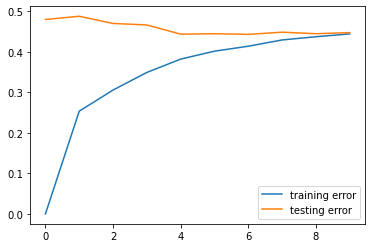

In [7]:
knn_tr_error = []
knn_te_error = []
k_values = [2**i for i in range(10)]
for k in k_values:
    naive_knn.K = k
    knn_tr_error.append(naive_knn.err(Xtr,Ytr))
    knn_te_error.append(naive_knn.err(Xte,Yte))
    print("k = {} done.".format(k))

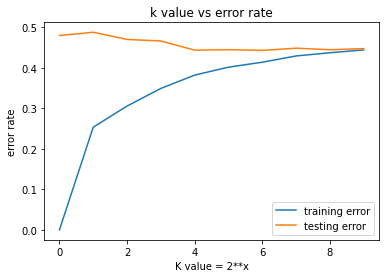

In [54]:
plt.plot(range(10),knn_tr_error, label= "training error")
plt.plot(range(10),knn_te_error, label= "testing error")
plt.title("k value vs error rate")
plt.xlabel("K value = 2**x")
plt.ylabel("error rate")
plt.savefig('output/kvalue_error.png')
plt.legend()
plt.show()

### Well, naive Knn does not seem doing well, need some feature selection

First come into mind is the emsemble technique, which pick only a portion of feature to the leaner.

In [8]:
# KNN with limited feature enabled
class KNN_f(ml.knn.knnClassify):
    def __init__(self, X=None, Y=None,features = 1, K=1):
        self.selected_feature = sorted( np.random.choice(range(X.shape[1]),features , replace=False) )
        ml.knn.knnClassify.__init__(self,X[:,self.selected_feature],Y,K)
    
    def predictSoft(self,X):
        if(X.shape[1] == len(self.selected_feature)):
            return ml.knn.knnClassify.predictSoft(self,X)
        return ml.knn.knnClassify.predictSoft(self,X[:,self.selected_feature])

In [9]:
class E_knn(ml.classifier):
    def __init__(self,Xtr,Ytr,nbags=1,features=1,K = 1, partition = 1):
        self.classifiers = [ None ] * nbags # Allocate space for learners
        self.features_number = features
        self.nbags = nbags
        self.n_boot = X.shape[0]//partition
        self.classes = list(np.unique(Ytr))
        for i in range(nbags):
            Xi, Yi = ml.bootstrapData(Xtr,Ytr,self.n_boot)
            knn_f = ml.knn.knnClassify(Xi, Yi,K)
            self.classifiers[i]=knn_f
            
    def predictSoft(self,X):
        Y = np.zeros( (X.shape[0], self.nbags,2) )
        for i in range(self.nbags):
            Y[:,i] = self.classifiers[i].predictSoft(X)
        return np.mean(Y,axis=1)

nb = 1 done.
nb = 2 done.
nb = 4 done.
nb = 8 done.
nb = 16 done.
nb = 32 done.
nb = 64 done.
nb = 128 done.
nb = 256 done.
nb = 512 done.
nb = 1024 done.
nb = 2048 done.


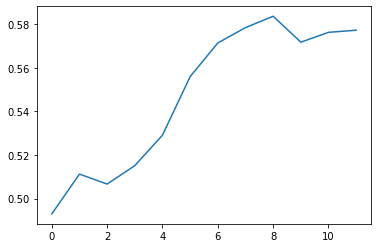

In [10]:
auc_list = []
nbags = [2**i for i in range(12)]
for nb in nbags:
    a = E_knn(Xtr,Ytr,nb,107,1,100)
    auc_list.append(a.auc(Xte,Yte))
    print("nb = {} done.".format(nb))

In [ ]:
plt.title("number of learner vs AUC value")
plt.xlabel("number of learner = 2**x")
plt.ylabel("AUC value")
plt.plot(auc_list)
plt.show()

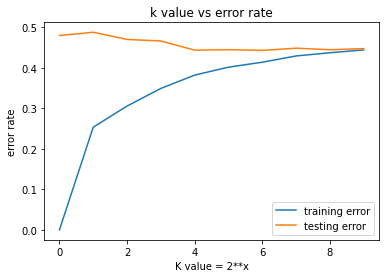

In [32]:
plt.plot(range(10),knn_tr_error, label= "training error")
plt.plot(range(10),knn_te_error, label= "testing error")
plt.legend()
plt.xlabel("K value = 2**x")
plt.ylabel("error rate")
plt.savefig('output/knn.png')
plt.title("k value vs error rate")
plt.show()

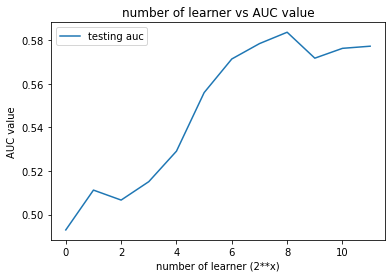

In [37]:
plt.plot(auc_list,label = "testing auc")
plt.xlabel("number of learner (2**x)")
plt.ylabel("AUC value")
plt.legend()
plt.title("number of learner vs AUC value")
plt.savefig('output/eknn.png')
plt.show()

In [20]:
class E_knn_limited(ml.classifier):
    def __init__(self,Xtr,Ytr,nbags=1,features=1,K = 1, partition = 1):
        self.classifiers = [ None ] * nbags # Allocate space for learners
        self.features_number = features
        self.nbags = nbags
        self.n_boot = X.shape[0]//partition
        self.classes = list(np.unique(Ytr))
        for i in range(nbags):
            Xi, Yi = ml.bootstrapData(Xtr,Ytr,self.n_boot)
            knn_f = ml.knn.KNN_f(Xi, Yi,features,K)
            self.classifiers[i]=knn_f
            
    def predictSoft(self,X):
        Y = np.zeros( (X.shape[0], self.nbags,2) )
        for i in range(self.nbags):
            Y[:,i] = self.classifiers[i].predictSoft(X)
        return np.mean(Y,axis=1)

In [26]:
auc_list_limited = []
features = [(107//(2*i)) for i in range(1,10)]
for f in features:
    a = E_knn(Xtr,Ytr,256,f,1,100)
    auc_list_limited.append(a.auc(Xte,Yte))
    print("feature = {} done.".format(f))

nb = 2048 done.
nb = 2048 done.
nb = 2048 done.
nb = 2048 done.
nb = 2048 done.
nb = 2048 done.
nb = 2048 done.
nb = 2048 done.
nb = 2048 done.


ValueError: x and y must have same first dimension, but have shapes (9,) and (2,)

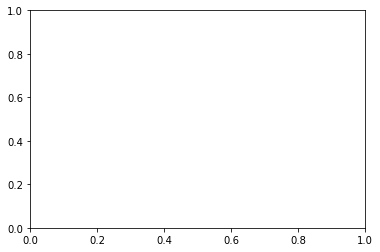

In [56]:
plt.plot(features,auc_list_limited,label = "testing auc")
plt.xlabel("number of feature used (2**x)")
plt.ylabel("AUC value")
plt.title("number of features used vs AUC value")
plt.savefig('output/feature_auc.png')
plt.legend()
plt.show()

In [29]:
features

[53, 26, 17, 13, 10, 8, 7, 6, 5]

In [41]:
auc_list_limited_new = []
new_features = [i for i in range(17,26)]
for f in new_features:
    a = E_knn(Xtr,Ytr,256,f,1,100)
    auc_list_limited_new.append(a.auc(Xte,Yte))
    print("feature = {} done.".format(f))

feature = 17 done.
feature = 18 done.
feature = 19 done.
feature = 20 done.
feature = 21 done.
feature = 22 done.
feature = 23 done.
feature = 24 done.
feature = 25 done.


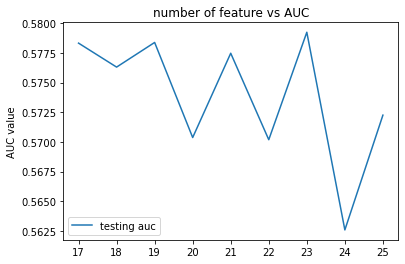

In [45]:
plt.plot(new_features,auc_list_limited_new,label = "testing auc")
plt.title("number of features used vs AUC value")
plt.ylabel("AUC value")
plt.legend()
plt.savefig('output/auc_2.png')
plt.title("number of feature vs AUC")
plt.show()

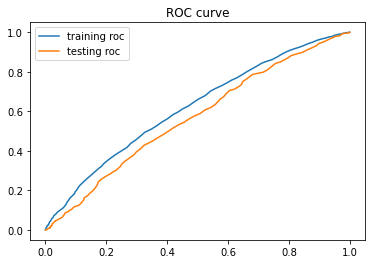

In [51]:
a = E_knn(Xtr,Ytr,256,21,1,100)
plot_roc(a,data,"roc_f21")

In [53]:
generating_output(a,"knn_out")